# Significance Test 


to check if the difference of values over years is statistically significant or random.
### Null Hypothesis: 
There is no statistically significant difference between values over years.
### Alternative Hypothesis: 
There is statistically significant difference between values over years.

#### Friedman statistical test: 
As we don't have information about the distribution of data, ranking-based tests are used.

Multiple number of parameters to test (years here) makes us to choose Friedman test instead Wilcoxson test.

In the case of normal distribution we can use ANOVA test. 

Pairwise posthoc test is not necessary, as we just want to check the significance and not to extract the most or least extreme values.

In [45]:
import numpy as np
import warnings
import pandas as pd
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
warnings.filterwarnings('ignore') # Just to mute warnings, if you like you can comment this line.

In [46]:
df = pd.read_csv('data/Clean_Data/cl-tobac-use.csv')

In [47]:
# Calculates the total usage for both genders. And drop unnecessary columns.
df['Total_Use'] = df['Male'] + df['Female']
df.drop(['Male', 'Female', 'Country'] , axis=1, inplace=True)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop([0])
df.head()

,Year,Total_Use
0,2015,58.8
1,2012,60.3
2,2010,61.8
3,2005,64.8
4,2000,68.5


In [48]:
# Extract data for each year.
data =[] 

for year in df['Year'].unique():
    values = df[df['Year'] == year]
    values.drop(['Year'], axis=1, inplace=True)
    data.append(values.to_numpy().transpose()[0])
data = np.array(data)


In [49]:
alpha = 0.05
#Friedman Test.
stat, p = friedmanchisquare(data[0], data[1], data[2], data[3], data[4])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=161.830, p=0.000
Different distributions (reject H0)


<div class="alert alert-block alert-info">
<b>Result of Friedman test:</b> P value is 0, so the result of Friedman test shows different distribution based on years. 
</div>

In [50]:
dt = pd.DataFrame({'2015':data[0], '2012':data[1], '2010':data[2], '2005':data[3], '2000':data[4]})
x = dt.melt(var_name='groups', value_name='values')
res = sp.posthoc_nemenyi(x, val_col='values', group_col='groups')
res

,2000,2005,2010,2012,2015
2000,-1.000000,0.725333,0.110847,0.042501,0.008762
2005,0.725333,-1.000000,0.788705,0.571125,0.280471
2010,0.110847,0.788705,-1.000000,0.996935,0.926107
2012,0.042501,0.571125,0.996935,-1.000000,0.990217
2015,0.008762,0.280471,0.926107,0.990217,-1.000000


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe837d671d0>,
 <matplotlib.colorbar.ColorbarBase at 0x7fe837cd5630>)

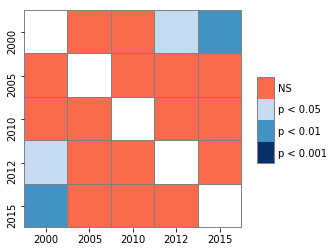

In [51]:
res.to_csv('results-nemenyi-hit-fb15k-.csv')
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(res, **heatmap_args)

<div class="alert alert-block alert-info">
<b>Result of Nemenyi Post-hoc test:</b> The most significant difference is between values for year 2000 and 2015 and 2012 respectively. 
</div>